## Machine Learning Project

### Scouting for new players

We are a new football club **JayWalkers United FC** and we are interested in forming a team.
Given that we are just starting and dont have the biggest budget, we want to sign young players that have the highest potential.
But we dont know whats the age to sign, when do players peak and where to start

So we collected FIFA'19 Dataset and their value from the European Transfer Market to do analysis


In [0]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://images-eds-ssl.xboxlive.com/image?url=8Oaj9Ryq1G1_p3lLnXlsaZgGzAie6Mnu24_PawYuDYIoH77pJ.X5Z.MqQPibUVTc5o.Gms14yKJcD4Yna5HIccFnKcFU7N.HfH0oe2YIHkEMJO3S84KD_nC5TwPJ5480dUQAJHc.Ogt9Xhli_UCxvZgkK9.kordYm.dkORgpMthj.DlcJTAFdFgX6Y33IItQTCI3Xqh3gz1KG4PYhcN_na.A1pP8axq13W84z3AUHjA-", width=200, height=200)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np 
import pandas as pd 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns




## 1- Data Cleaning

## 1.1 Import Data

In [0]:

df = pd.read_csv('/content/gdrive/My Drive/Machine Learning/Brainstation/Project/data.csv')

df.head()

UnicodeDecodeError: ignored

In [5]:

df = pd.read_csv('/content/gdrive/My Drive/Machine Learning/Project/data.csv', encoding='latin-1')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

### 1.2 Drop unwanted columns

In [0]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [0]:
import missingno
#To reduce the amount of data lets drop the coulmns which doesnt have lots of data

missingno.bar??

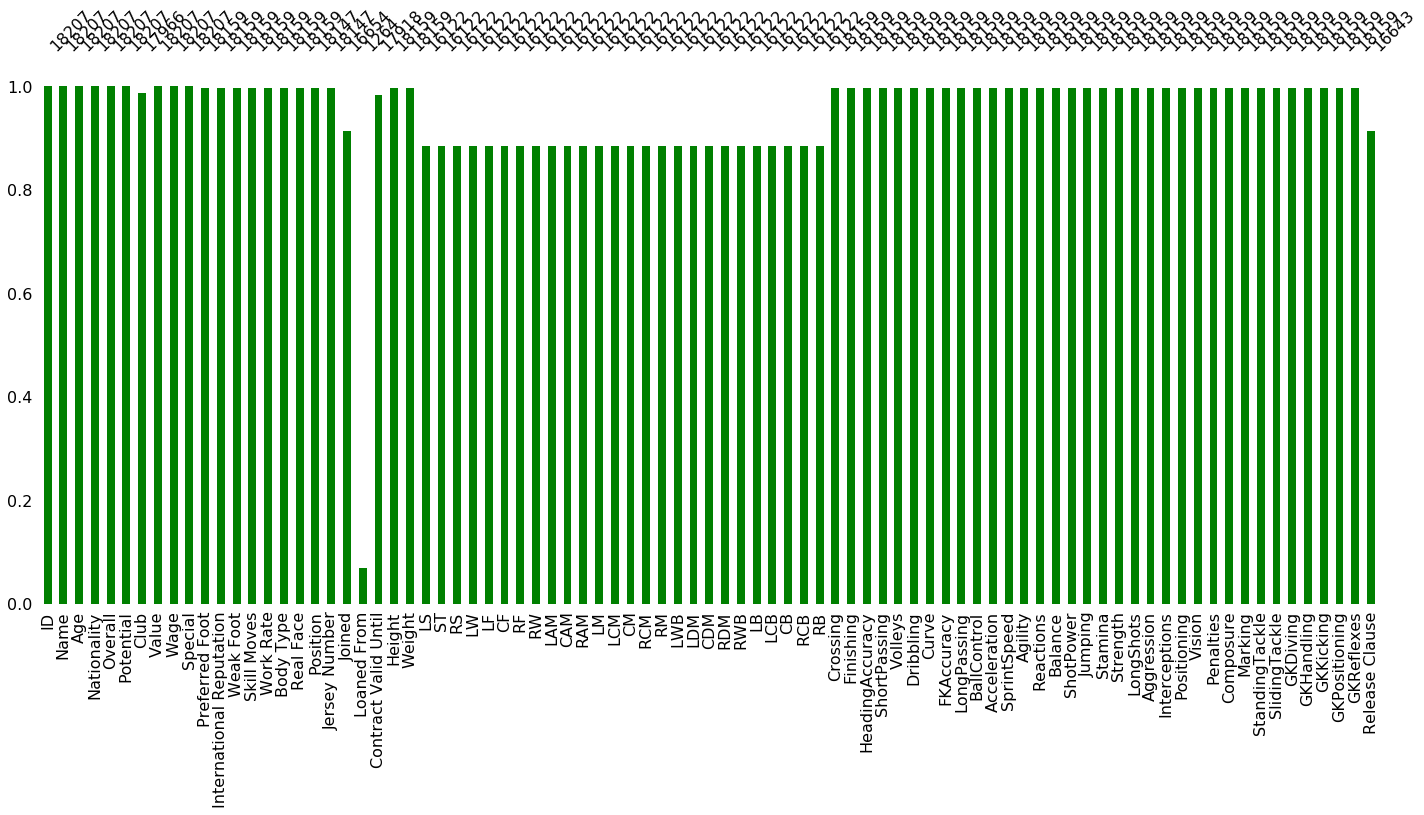

In [0]:
missingno.bar(df,color='green')
#Too less data in Loaned from so lets drop it

In [0]:
df.drop(['Loaned From'],axis=1,inplace=True)

### 1.3 Display Money values properly

In [0]:
# Changing money values to strings
Money = ['Value', 'Wage', 'Release Clause']
for f in Money:
    df[f] = df[f].apply(lambda x: str(x)[1:])
    
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5M,565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77M,405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5M,290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72M,260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102M,355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [0]:
# K=1000 thousand and M=1000000  million
import re
def convert(value):
    regex = r'K|M'
    m = re.search(regex, value)
    if m:
        value = re.sub(regex, "", value)
        
        if m.group() == "M":
            value = pd.to_numeric(value) * 1000000
            
        if m.group() == 'K':
            value = pd.to_numeric(value) * 1000            
            
    return value
            
for f in Money:
    df[f] = df[f].apply(convert)

df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,1.105e+08,565000,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265e+08
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271e+08
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,1.185e+08,290000,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.281e+08
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386e+08
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.964e+08


In [0]:
df['Value'] = df['Value'].astype(int)
df['Wage'] = df['Wage'].astype(int)
# Release Clause is not complete so cant

In [0]:
 df.dropna(subset=['Position'], inplace = True)

## 2- Preliminary Analysis

In [0]:
print('Most valued player : '+ str (df.loc[df['Value'].idxmax()][1]) + ' With Value of: $' + str (df.loc[df['Value'].idxmax()][7]))
print('Highest earner : '+str(df.loc[df['Wage'].idxmax()][1])  + ' With Wage of: $' + str (df.loc[df['Wage'].idxmax()][8]))

Most valued player : Neymar Jr With Value of: $118500000
Highest earner : L. Messi With Wage of: $565000


In [0]:
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]) + ' With  Potential of: ' + str (df.loc[df['Potential'].idxmax()][5]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]) + ' With Overall Score of: ' + str (df.loc[df['Overall'].idxmax()][4]))

Maximum Potential : K. Mbappé With  Potential of: 95
Maximum Overall Perforamnce : L. Messi With Overall Score of: 94


### 2.1 Age Distribution

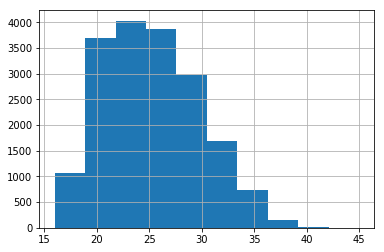

In [0]:
df.Age.hist()

In [0]:
df.Age.mean()

25.122205745043114

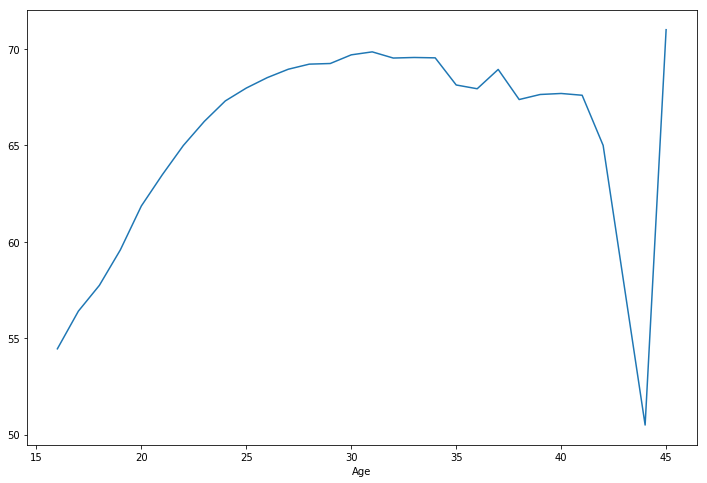

In [0]:
rating_age = df.groupby("Age")["Overall"].mean()
rating_age.plot(figsize=(12,8))

### 2.2 Encoding All the positions into 5 positions
        a. Goal Keeper
        b. Defence
        c. Midfield
        d. Lateral Midfield
        e. Striker

In [0]:
df.loc[df['Position'] == 'GK', 'Real_Position'] = 1 #'GOAL KEEPER'

df.loc[df['Position'] == 'CB', 'Real_Position'] = 2 #'DEFENCE'
df.loc[df['Position'] == 'LCB', 'Real_Position'] = 2 #'DEFENCE'
df.loc[df['Position'] == 'RB', 'Real_Position'] = 2 #'DEFENCE'
df.loc[df['Position'] == 'LB', 'Real_Position'] = 2 #'DEFENCE'
df.loc[df['Position'] == 'LWB', 'Real_Position'] = 2 #'DEFENCE'
df.loc[df['Position'] == 'RWB', 'Real_Position'] = 2 #'DEFENCE'

df.loc[df['Position'] == 'CDM', 'Real_Position'] = 3 #'MIDFIELDER'
df.loc[df['Position'] == 'CM', 'Real_Position'] = 3 #'MIDFIELDER'
df.loc[df['Position'] == 'CAM', 'Real_Position'] = 3 #'MIDFIELDER'
df.loc[df['Position'] == 'CAM', 'Real_Position'] = 3 #'MIDFIELDER'
df.loc[df['Position'] == 'RM', 'Real_Position'] = 3 #'MIDFIELDER'
df.loc[df['Position'] == 'LM', 'Real_Position'] = 3 #'MIDFIELDER'
df.loc[df['Position'] == 'LDM', 'Real_Position'] = 3 #'MIDFIELDER'
df.loc[df['Position'] == 'RDM', 'Real_Position'] = 3 #'MIDFIELDER'


df.loc[df['Position'] == 'RW', 'Real_Position'] = 4 #'LATERAL MIDFIELDER'
df.loc[df['Position'] == 'LW', 'Real_Position'] = 4 #'LATERAL MIDFIELDER'
df.loc[df['Position'] == 'RCM', 'Real_Position'] = 4 #'LATERAL MIDFIELDER'
df.loc[df['Position'] == 'LCM', 'Real_Position'] = 4 #'LATERAL MIDFIELDER'
df.loc[df['Position'] == 'LAM', 'Real_Position'] = 4 #'LATERAL MIDFIELDER'
df.loc[df['Position'] == 'RAM', 'Real_Position'] = 4 #'LATERAL MIDFIELDER'

df.loc[df['Position'] == 'CF', 'Real_Position'] = 5 #'STRIKER'
df.loc[df['Position'] == 'RF', 'Real_Position'] = 5 #'STRIKER'
df.loc[df['Position'] == 'LF', 'Real_Position'] = 5 #'STRIKER'
df.loc[df['Position'] == 'ST', 'Real_Position'] = 5 #'STRIKER'
df.loc[df['Position'] == 'LS', 'Real_Position'] = 5 #'STRIKER'
df.loc[df['Position'] == 'RS', 'Real_Position'] = 5 #'STRIKER'


In [0]:
#df.loc[#df['Position'] == 'GK', 'Real_Position'] = 'Goal Keeper' #'GOAL KEEPER'

#df.loc[#df['Position'] == 'CB', 'Real_Position'] = 'Defence' #'DEFENCE'
#df.loc[#df['Position'] == 'LCB', 'Real_Position'] = 'Defence' #'DEFENCE'
#df.loc[#df['Position'] == 'RB', 'Real_Position'] = 'Defence' #'DEFENCE'
#df.loc[#df['Position'] == 'LB', 'Real_Position'] = 'Defence' #'DEFENCE'
#df.loc[#df['Position'] == 'LWB', 'Real_Position'] = 'Defence' #'DEFENCE'
#df.loc[#df['Position'] == 'RWB', 'Real_Position'] = 'Defence' #'DEFENCE'

#df.loc[#df['Position'] == 'CDM', 'Real_Position'] = 'Mi#dfielder' #'MI#dfIELDER'
#df.loc[#df['Position'] == 'CM', 'Real_Position'] = 'Mi#dfielder' #'MI#dfIELDER'
#df.loc[#df['Position'] == 'CAM', 'Real_Position'] = 'Mi#dfielder' #'MI#dfIELDER'
#df.loc[#df['Position'] == 'CAM', 'Real_Position'] = 'Mi#dfielder' #'MI#dfIELDER'
#df.loc[#df['Position'] == 'RM', 'Real_Position'] = 'Mi#dfielder' #'MI#dfIELDER'
#df.loc[#df['Position'] == 'LM', 'Real_Position'] = 'Mi#dfielder' #'MI#dfIELDER'
#df.loc[#df['Position'] == 'LDM', 'Real_Position'] = 'Mi#dfielder' #'MI#dfIELDER'
#df.loc[#df['Position'] == 'RDM', 'Real_Position'] = 'Mi#dfielder' #'MI#dfIELDER'


#df.loc[#df['Position'] == 'RW', 'Real_Position'] = 'Lateral Mi#dfielder' #'LATERAL MI#dfIELDER'
#df.loc[#df['Position'] == 'LW', 'Real_Position'] = 'Lateral Mi#dfielder' #'LATERAL MI#dfIELDER'
#df.loc[#df['Position'] == 'RCM', 'Real_Position'] = 'Lateral Mi#dfielder' #'LATERAL MI#dfIELDER'
#df.loc[#df['Position'] == 'LCM', 'Real_Position'] = 'Lateral Mi#dfielder' #'LATERAL MI#dfIELDER'
#df.loc[#df['Position'] == 'LAM', 'Real_Position'] = 'Lateral Mi#dfielder' #'LATERAL MI#dfIELDER'
#df.loc[#df['Position'] == 'RAM', 'Real_Position'] = 'Lateral Mi#dfielder' #'LATERAL MI#dfIELDER'

#df.loc[#df['Position'] == 'CF', 'Real_Position'] = 'Striker' #'STRIKER'
#df.loc[#df['Position'] == 'RF', 'Real_Position'] = 'Striker' #'STRIKER'
#df.loc[#df['Position'] == 'LF', 'Real_Position'] = 'Striker' #'STRIKER'
#df.loc[#df['Position'] == 'ST', 'Real_Position'] = 'Striker' #'STRIKER'
#df.loc[#df['Position'] == 'LS', 'Real_Position'] = 'Striker' #'STRIKER'
#df.loc[#df['Position'] == 'RS', 'Real_Position'] = 'Striker' #'STRIKER'


In [0]:
 df.dropna(subset=['Real_Position'], inplace = True)

''

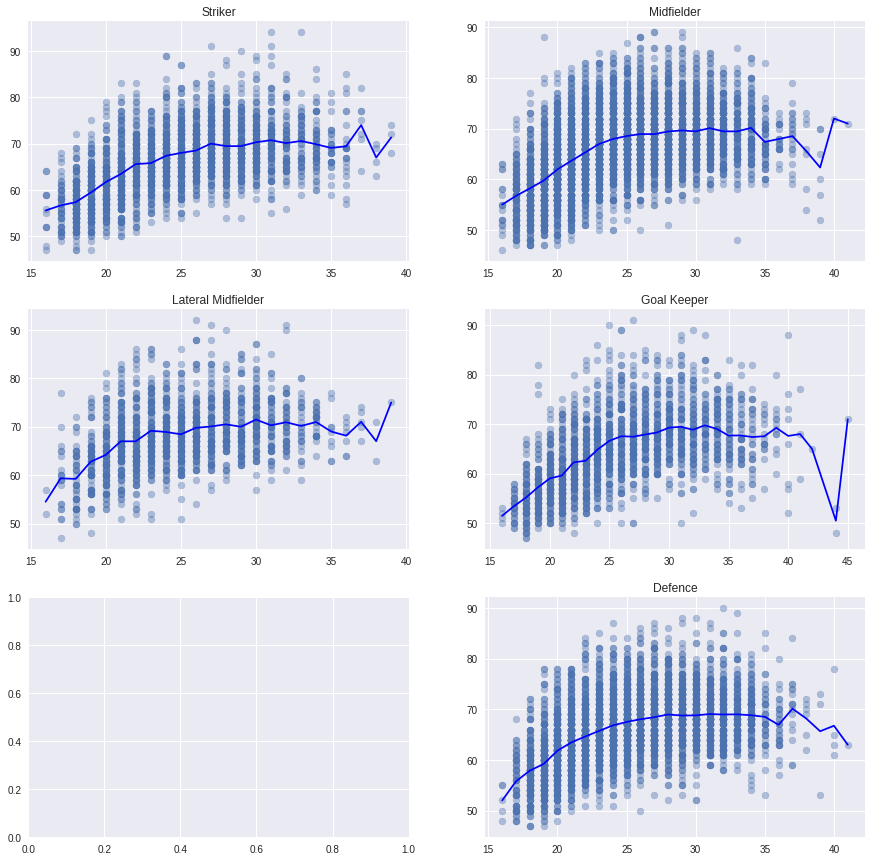

<Figure size 720x720 with 0 Axes>

In [0]:
positions = list(set(df['Real_Position']))
df_g = df.groupby(['Real_Position', 'Age'])
df_mean = df_g.mean().reset_index()
fig, axs = plt.subplots(3,2)
plt.figure(figsize=(10,10))
fig.set_figheight(15)
fig.set_figwidth(15)

for i, position in enumerate(positions):
    if i < 2:
        axs[0,i].scatter(df[df.Real_Position == position].Age, df[df.Real_Position == position].Overall, alpha=0.4)
        axs[0,i].set_title(position)
        axs[0,i].plot(df_mean[df_mean.Real_Position == position].Age, df_mean[df_mean.Real_Position == position].Overall, color='b')
    if i < 4 and i >= 2:
        axs[1,i-2].scatter(df[df.Real_Position == position].Age, df[df.Real_Position == position].Overall, alpha=0.4)
        axs[1,i-2].set_title(position)
        axs[1,i-2].plot(df_mean[df_mean.Real_Position == position].Age, df_mean[df_mean.Real_Position == position].Overall, color='b')
    if i < 6 and i >= 4:
        axs[2,i-5].scatter(df[df.Real_Position == position].Age, df[df.Real_Position == position].Overall, alpha=0.4)
        axs[2,i-5].set_title(position)
        axs[2,i-5].plot(df_mean[df_mean.Real_Position == position].Age, df_mean[df_mean.Real_Position == position].Overall, color='b')
;   
''

1. We saw that even if the average age of a soccer player is about 25 years (at least in 2019), 25% of the players are 30 or older
2. We observed that players reach their peak performance at about 30 before dropping

# Supervised Learning

## 3) Linear Regression Analysis

### Lets see if there is any linear relationship for players attributes

C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


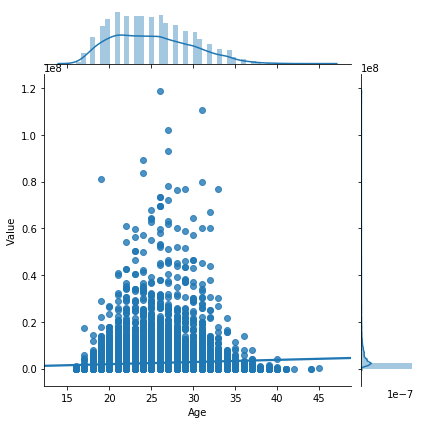

In [0]:
sns.jointplot(x="Age", y="Value", data=df , kind='reg')

In [0]:
df['log_Value'] = np.log1p(df['Value'])


C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


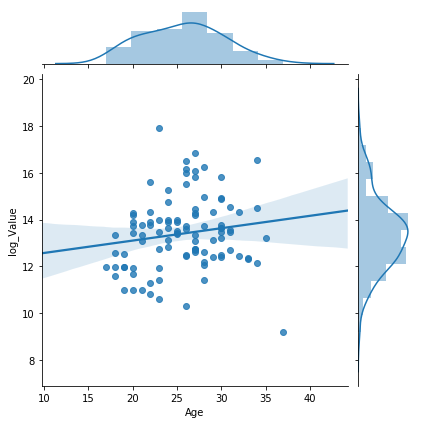

In [0]:
sns.jointplot(x="Age", y="log_Value", data=df.sample(100), kind='reg')

C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


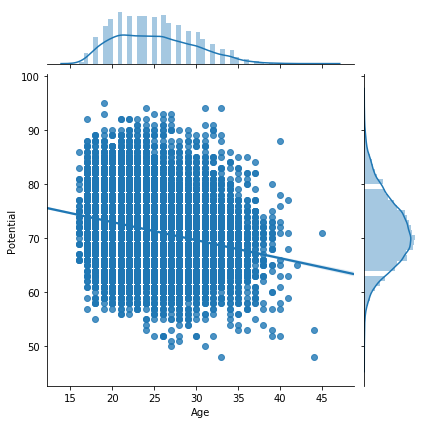

In [0]:
sns.jointplot(x='Age',y='Potential',data = df, kind='reg')

#Potential tends to fall as you grow old

C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


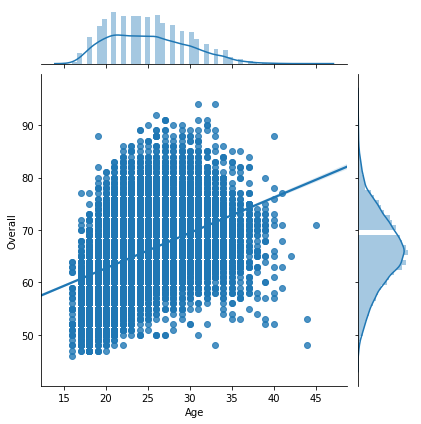

In [0]:
sns.jointplot(x='Age',y='Overall',data = df, kind='reg')

1. Overall performance goes up with Age
2. Potential goes down with Age
3. Value goes up with Age

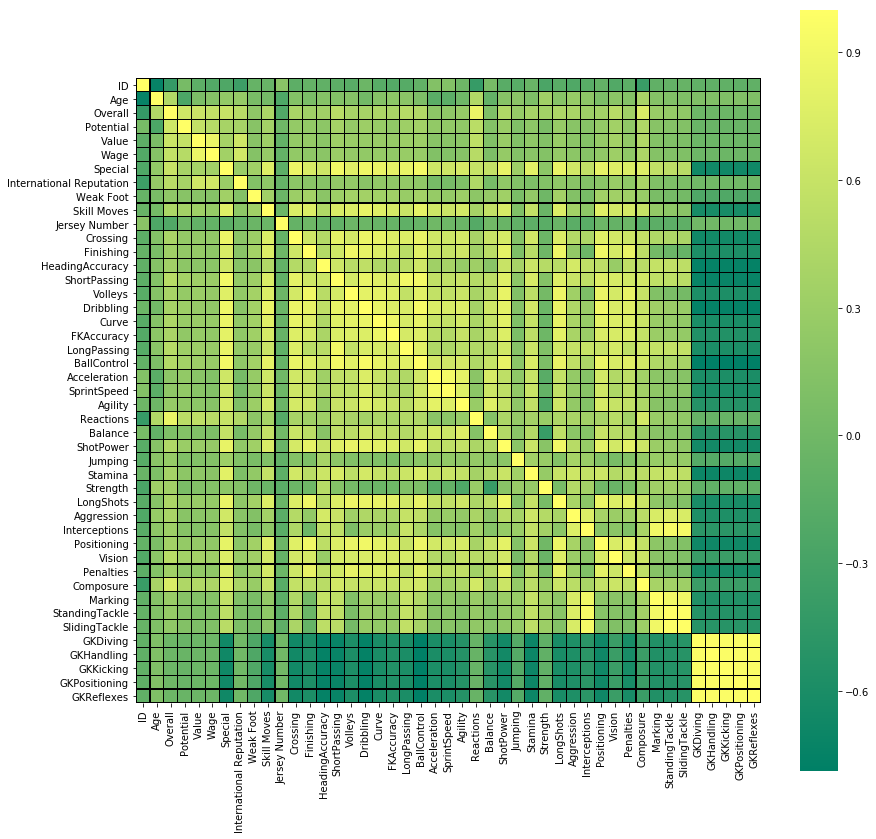

In [0]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),linewidths=0.1,linecolor='black',square=True,cmap='summer')


In [0]:
df3 = df[['Age','Name','BallControl','SprintSpeed','Reactions','ShotPower','Stamina','Strength','Positioning','Composure','Value']]
df3.head()

,Age,Name,BallControl,SprintSpeed,Reactions,ShotPower,Stamina,Strength,Positioning,Composure,Value
0,31,L. Messi,96.0,86.0,95.0,85.0,72.0,59.0,94.0,96.0,110500000
1,33,Cristiano Ronaldo,94.0,91.0,96.0,95.0,88.0,79.0,95.0,95.0,77000000
2,26,Neymar Jr,95.0,90.0,94.0,80.0,81.0,49.0,89.0,94.0,118500000
3,27,De Gea,42.0,58.0,90.0,31.0,43.0,64.0,12.0,68.0,72000000
4,27,K. De Bruyne,91.0,76.0,91.0,91.0,90.0,75.0,87.0,88.0,102000000


C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


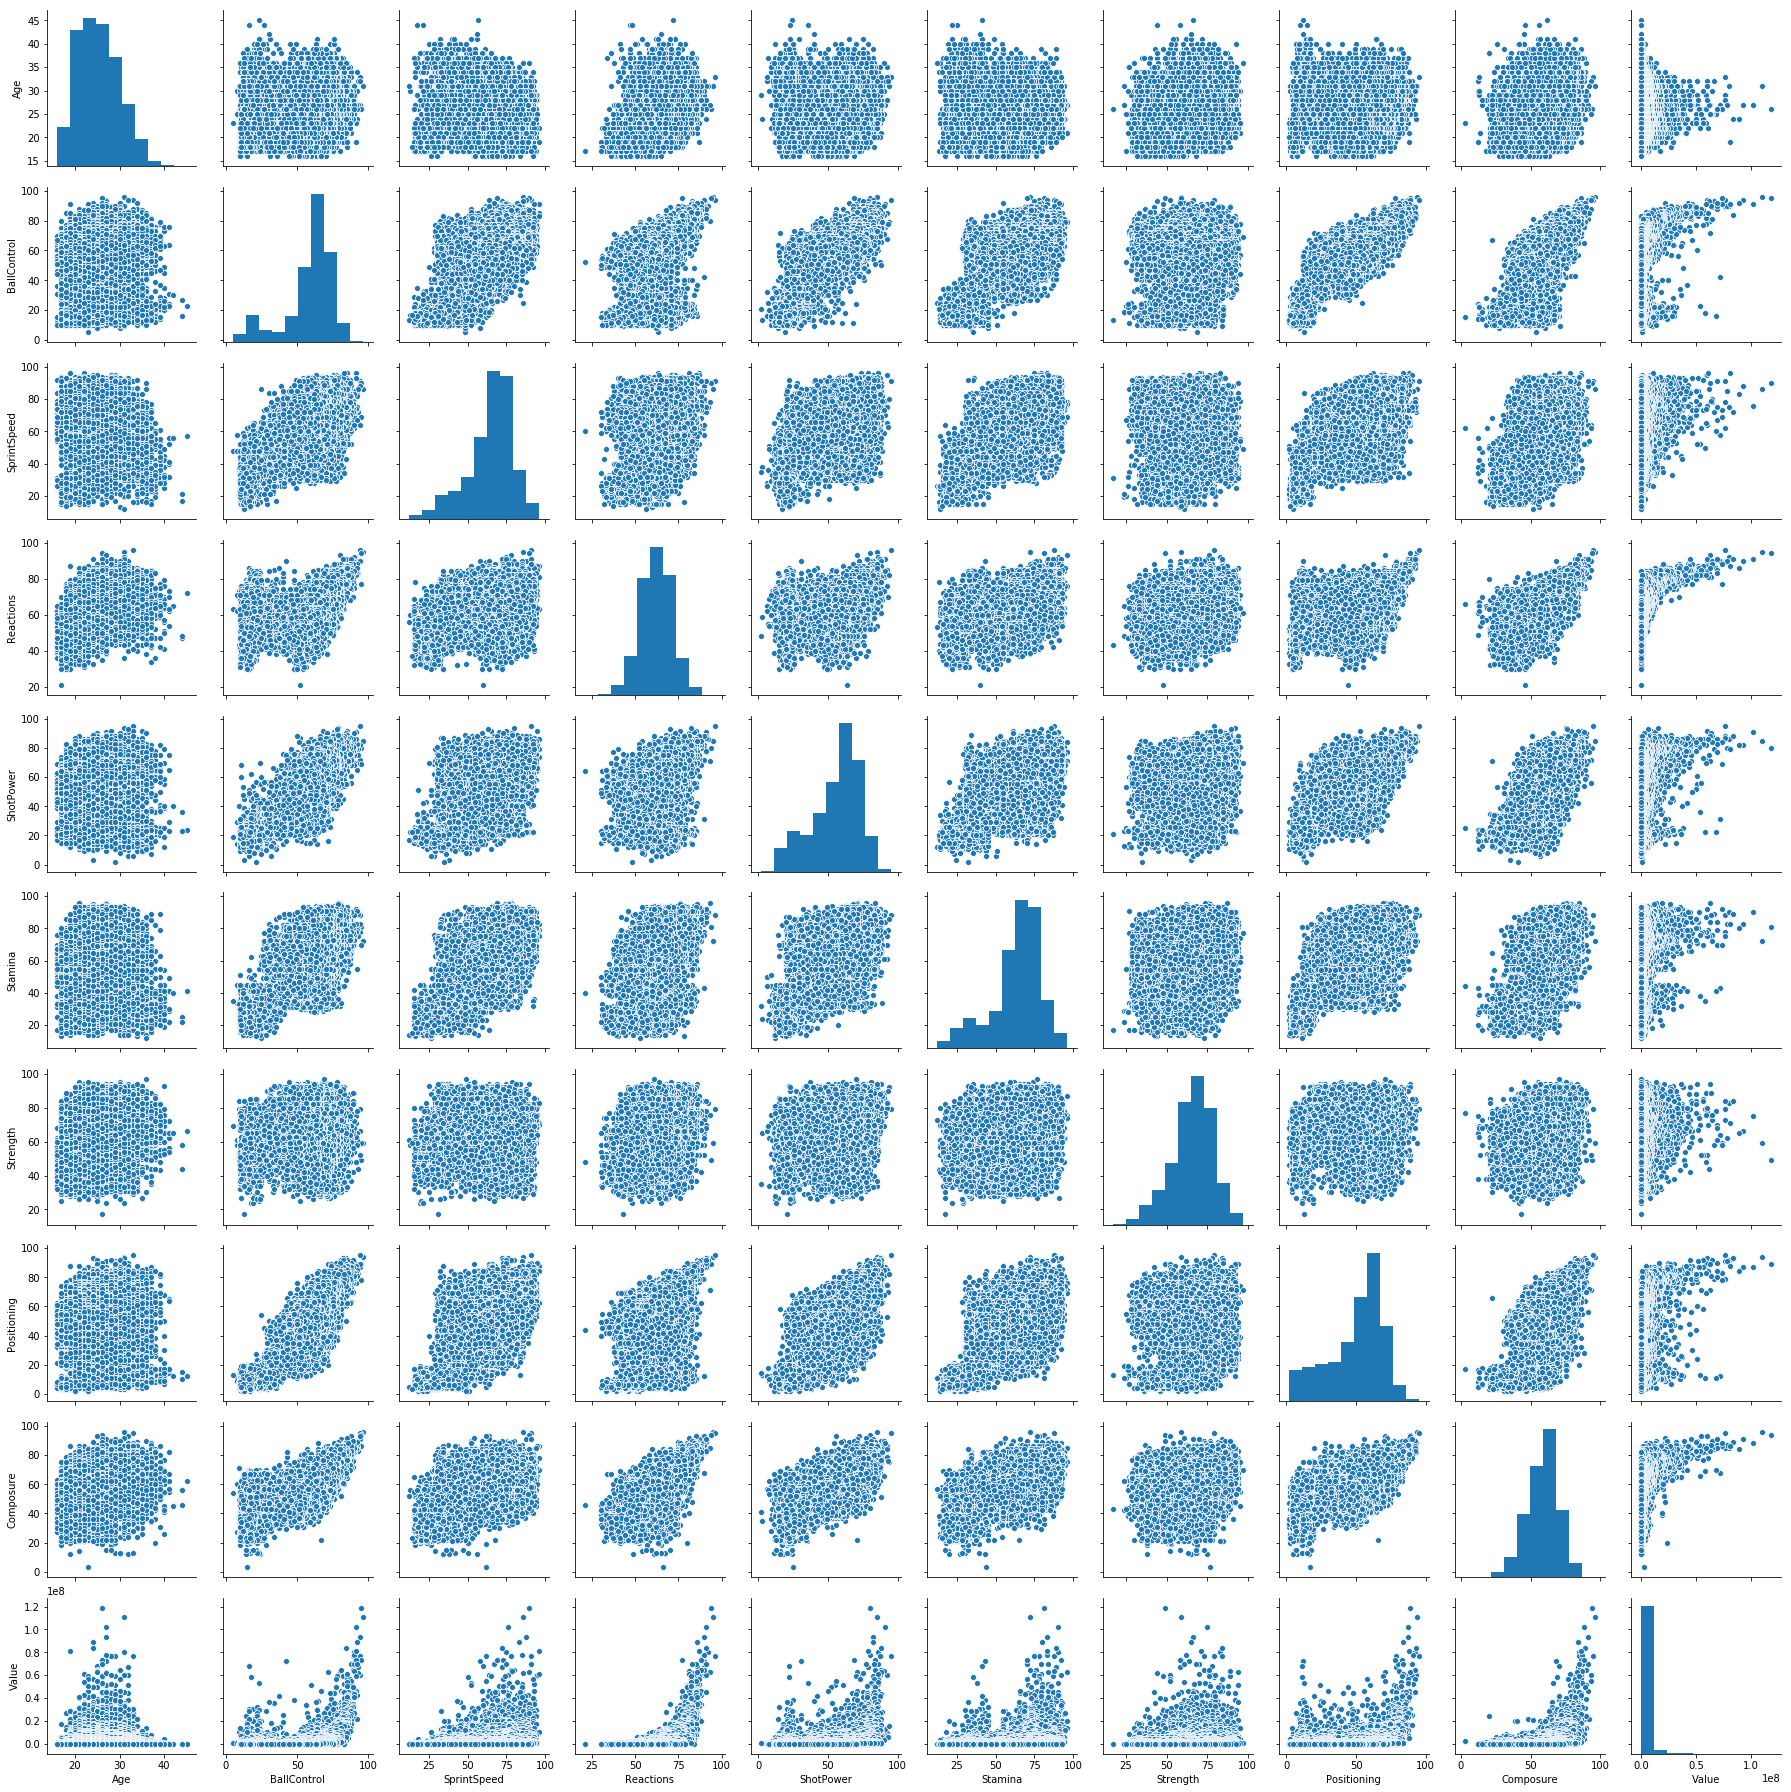

In [0]:
sns.pairplot(df3)

This shows that the only relationships are between Value and their skills. IE the better skills, their value goes up, which goes with the normal hypothesis

C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


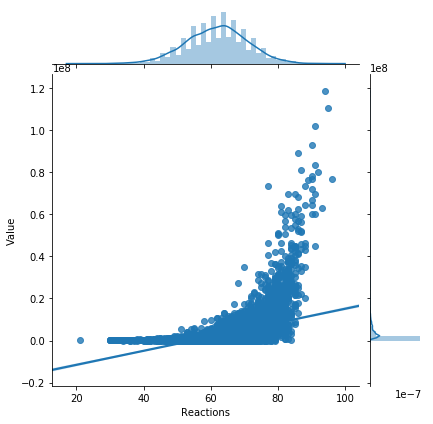

In [0]:
sns.jointplot(x='Reactions',y='Value',data = df, kind='reg')

C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


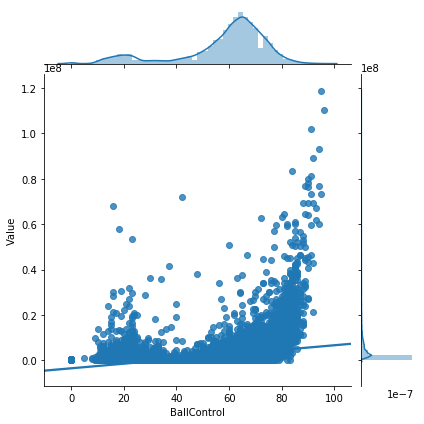

In [0]:
sns.jointplot(x='BallControl',y='Value',data = df, kind='reg')

Main Contributors for Value is:
    1. Reactions
    2. Composure
    3. Ball Control

In [0]:
import statsmodels.formula.api as smf  # import the formula tools

model = smf.ols(data = df, formula = "Value ~ Age + Overall")  # create the linear regression model object. 
                                               # "ols" stands for ordinary least squares.
result = model.fit()  # create a RegressionResults object
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     6969.
Date:                Thu, 28 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:13:26   Log-Likelihood:            -2.9139e+05
No. Observations:               17485   AIC:                         5.828e+05
Df Residuals:                   17482   BIC:                         5.828e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.951e+07   3.06e+05    -96.554      0.000   -3.01e+07   -2.89e+07
Age        -3.134e+05   7589.602    -41.294      0.000   -3.28e+05   -2.99e+05
Overall      6.01e+05   5124.790    117.280      0.000    5.91e+05    6.11e+05
==============================================================================
Omnibus:                    24286.930   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9300688.373
Skew:                           8.030   Prob(JB):                         0.00
Kurtosis:                     114.840   Cond. No.                         687.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     370.1
Date:                Thu, 21 Mar 2019   Prob (F-statistic):           1.18e-81
Time:                        20:47:51   Log-Likelihood:            -2.0770e+05
No. Observations:               18207   AIC:                         4.154e+05
Df Residuals:                   18205   BIC:                         4.154e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6972.6879    883.215     -7.895      0.000   -8703.872   -5241.504
Age          664.9098     34.565     19.237      0.000     597.160     732.660
==============================================================================
Omnibus:                    24991.486   Durbin-Watson:                   0.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8011496.374
Skew:                           7.925   Prob(JB):                         0.00
Kurtosis:                     104.535   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
import statsmodels.formula.api as smf  # import the formula tools

model1 = smf.ols(data = df, formula = "log_Value ~ Age")  # create the linear regression model object. 
                                               # "ols" stands for ordinary least squares.
result1 = model1.fit()  # create a RegressionResults object
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Value   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     109.9
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.24e-25
Time:                        18:13:31   Log-Likelihood:                -37631.
No. Observations:               17485   AIC:                         7.527e+04
Df Residuals:                   17483   BIC:                         7.528e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5435      0.086    146.263      0.000      12.375      12.712
Age            0.0353      0.003     10.482      0.000       0.029       0.042
==============================================================================
Omnibus:                    13102.596   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           351488.815
Skew:                          -3.361   Prob(JB):                         0.00
Kurtosis:                      23.911   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Include only the columns we are measuring against to see any other relationship

In [0]:
list_of_columns = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','Value','Wage']
for column in list_of_columns:
      df[column] = df[column].replace(r'\s+', np.nan, regex=True)
      df[column] = df[column].fillna(0)


Use Feature selection to select the most important features

In [0]:
from sklearn import feature_selection
features_to_include = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']
feature_importances = feature_selection.mutual_info_regression(df[features_to_include],df['Value'])

C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [0]:
feat_importance_df = pd.DataFrame(list(zip(features_to_include,feature_importances)), columns=['feature','importance'])
top_feats = feat_importance_df.sort_values(by='importance', ascending=False).head()


,feature,importance
9,BallControl,0.529400
13,Reactions,0.523247
25,Composure,0.380768
5,Dribbling,0.379153
3,ShortPassing,0.353735


In [0]:
import sklearn as sk
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection, preprocessing

reg = sk.linear_model.LinearRegression()

In [0]:
regfit = reg.fit(df[top_feats], df['Value'])
regfit.score(df[top_feats], df['Value'])

0.27809451890642545

**Conclusions from Linear Regression Analysis:**
1. Even though we can use top 5 features to predict Value, its not a good score and therefore not reliable to know the value in future
2. As Value goes up with Age, and Potential goes down with Age. Buy young players lower than the average age of 25 and take our chances if that their value/potential will go up


## 4) Classification

We'll look at the players instead that have high potential and are undervalued. Those would have the best chance for success.

Create a new metric for $undervalued$ that:
1. Current Value is less than 2.4million (average)
2. Younger than 25 since they peak at 30
3. Have a higher potential than their current performance score

In [0]:
# If Potential > Overall score and value less than mean 2.7 million and less than 25
df['Undervalued'] = np.where((df['Value']<= 2410696) & (df['Potential'] > df['Overall']) & (df['Age'] <= 25 ) , 1, 0)

In [0]:
df[df["Undervalued"] == 1].head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Real_Position,Undervalued
452,207439,L. Paredes,24,Argentina,80,85,NaN,0,0,2122,...,75.0,72.0,9.0,14.0,6.0,9.0,10.0,an,3,1
997,223058,D. Kuzyaev,25,Russia,77,80,NaN,0,0,2041,...,77.0,76.0,15.0,16.0,13.0,7.0,8.0,an,3,1
1819,225144,P. Tau,24,South Africa,75,81,NaN,0,0,1837,...,35.0,25.0,6.0,13.0,13.0,15.0,11.0,an,4,1
2259,219740,Kahraba,24,Egypt,74,79,NaN,0,0,1848,...,29.0,18.0,7.0,9.0,16.0,15.0,7.0,an,3,1
2443,229804,A. Mitri??,23,Romania,74,80,NaN,0,0,1728,...,21.0,27.0,7.0,15.0,5.0,6.0,11.0,an,4,1


### 4.1 Feature Selection for Classification

In [0]:
features_to_include = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']
from sklearn import feature_selection
feature_rank = feature_selection.mutual_info_classif(df[features_to_include], df['Undervalued'])
feature_rank_df = pd.DataFrame(list(zip(features_to_include, feature_rank)), columns=['Feature', 'Score'])
feature_rank_df.sort_values(by='Score', ascending = False).head()


,Feature,Score
13,Reactions,0.212294
25,Composure,0.164462
9,BallControl,0.097335
22,Positioning,0.096714
3,ShortPassing,0.095805


<BarContainer object of 34 artists>

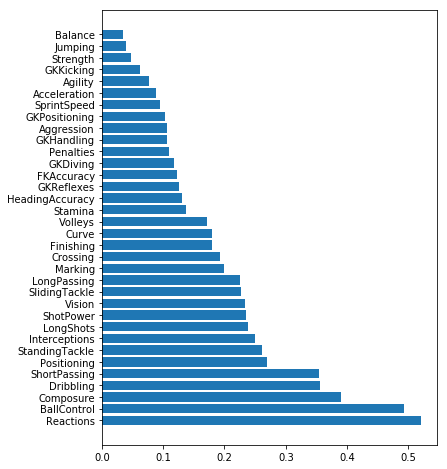

In [0]:
plt.figure(figsize=[6,8])
plt.barh(feat_importance_df['feature'], feat_importance_df['importance'])

### 4.2 Training the models

In [0]:
from sklearn.model_selection import train_test_split
import sklearn as sk
from sklearn import linear_model
X_trn, X_tst, Y_trn, Y_tst = train_test_split(df[features_to_include], df['Undervalued'], test_size=0.4)

In [0]:
logreg = sk.linear_model.LogisticRegression()
logreg.fit(df[features_to_include],df['Undervalued'])
logreg.score(df[features_to_include],df['Undervalued'])

0.8106948813268516

In [0]:
logreg = sk.linear_model.LogisticRegression()
logreg.fit(X_trn[features_to_include],Y_trn)

print('accuracy on training data',logreg.score(X_trn[features_to_include], Y_trn))
print('accuracy on test data',logreg.score(X_tst[features_to_include], Y_tst))

accuracy on training data 0.8107902011247736
accuracy on test data 0.8071203889047756


In [0]:
from sklearn.linear_model import RidgeClassifier

In [0]:
RidgeReg = linear_model.RidgeClassifier()
RidgeReg.fit(X_trn, Y_trn)
RidgeReg.score(X_tst, Y_tst)

0.8075493279954247

Using Logistic regression to predict future players if they are undervalued or overvalued, to invest in them.
And this scores higher than Linear Regression

In [0]:
def PlotBoundaries(model, X, Y) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)

    #Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y,s=12, edgecolor='k')
    plt.show()

In [0]:
two_features = ['Reactions', 'BallControl']

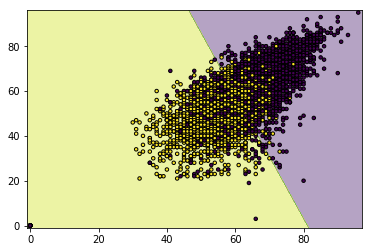

In [0]:
logreg2features = sk.linear_model.LogisticRegression().fit(X_trn[two_features],Y_trn)
PlotBoundaries(logreg2features,X_tst[two_features].values,Y_tst)

We plot only the 2 most important features to be able to visually inspect on 2 dimensions

### 4.3 Support Vector Classification

In [0]:
from sklearn.svm import SVC

kernel_SVM_model = SVC(kernel='rbf') #radial basis function mapping
kernel_SVM_model.fit(X_trn[features_to_include], Y_trn)

print('accuracy on training data',kernel_SVM_model.score(X_trn[features_to_include], Y_trn))
print('accuracy on test data',kernel_SVM_model.score(X_tst[features_to_include], Y_tst))

accuracy on training data 1.0
accuracy on test data 0.5388904775521876


Bad Results :()

### 4.4 Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=5)
random_forest_model.fit(X_trn[features_to_include], Y_trn)
 
print('accuracy on training data',random_forest_model.score(X_trn[features_to_include], Y_trn))
print('accuracy on test data',random_forest_model.score(X_tst[features_to_include], Y_tst))

accuracy on training data 0.8143170336478887
accuracy on test data 0.8014012010294538


### 4.5 Gradient Boosting Classifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(n_estimators=50, max_depth=5, min_samples_leaf=100)
gbm_model.fit(X_trn[features_to_include], Y_trn)
 
print('accuracy on training data',gbm_model.score(X_trn[features_to_include], Y_trn))
print('accuracy on test data',gbm_model.score(X_tst[features_to_include], Y_tst))

accuracy on training data 0.8574969021065675
accuracy on test data 0.8251358307120389


In [0]:
RidgeReg = linear_model.RidgeClassifier()
RidgeReg.fit(X_trn, Y_trn)
RidgeReg.score(X_tst, Y_tst)

0.8075493279954247

Best scores go to **Gradient Boosting Classifier**

# Unsupervised Learning

## 5- Clustering Player Positions

### Now we know how to predict undervalued players lets try to pick our team based on their positions

In [0]:
from sklearn import preprocessing

In [0]:
features_to_include_PCA = ['ID',  'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Undervalued']

In [0]:
df = df.fillna(0)

### 5.1 Cleaning and Scaling Data

On each postion there are unclean data to show potential. For example their score on Striker (ST) is 82+2. So will need some cleaning to remove those and just show '82' (their actual score)

In [0]:
df['LS'] = df['LS'].map(lambda x: str(x)[:2])
df['ST'] = df['ST'].map(lambda x: str(x)[:2])
df['RS'] = df['RS'].map(lambda x: str(x)[:2])
df['LW'] = df['LW'].map(lambda x: str(x)[:2])
df['LF'] = df['LF'].map(lambda x: str(x)[:2])
df['CF'] = df['CF'].map(lambda x: str(x)[:2])
df['RF'] = df['RF'].map(lambda x: str(x)[:2])
df['RW'] = df['RW'].map(lambda x: str(x)[:2])
df['LAM'] = df['LAM'].map(lambda x: str(x)[:2])
df['CAM'] = df['CAM'].map(lambda x: str(x)[:2])
df['RAM'] = df['RAM'].map(lambda x: str(x)[:2])
df['LM'] = df['LM'].map(lambda x: str(x)[:2])
df['LCM'] = df['LCM'].map(lambda x: str(x)[:2])
df['CM'] = df['CM'].map(lambda x: str(x)[:2])
df['RCM'] = df['RCM'].map(lambda x: str(x)[:2])
df['RM'] = df['RM'].map(lambda x: str(x)[:2])
df['LWB'] = df['LWB'].map(lambda x: str(x)[:2])
df['LDM'] = df['LDM'].map(lambda x: str(x)[:2])
df['CDM'] = df['CDM'].map(lambda x: str(x)[:2])
df['RDM'] = df['RDM'].map(lambda x: str(x)[:2])
df['RWB'] = df['RWB'].map(lambda x: str(x)[:2])
df['LB'] = df['LB'].map(lambda x: str(x)[:2])
df['LCB'] = df['LCB'].map(lambda x: str(x)[:2])
df['CB'] = df['CB'].map(lambda x: str(x)[:2])
df['RB'] = df['RB'].map(lambda x: str(x)[:2])
df['RCB'] = df['RCB'].map(lambda x: str(x)[:2])


Standardize the data with minmaxscaler preprocessing: max value of 1, min of 0 -> important for effective K-means clustering.
    

In [0]:
from sklearn.preprocessing import StandardScaler

dfpca = df [features_to_include_PCA]
#dfpca = df.groupby('Real_Position').transform(lambda x: (x - x.mean()) / x.std())
#dfnm = dfnm.fillna(0)
#dfnm.head()
scaler = StandardScaler()
scaler.fit(dfpca)
X = scaler.transform(dfpca)
X.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


(17485, 62)

### 5.2 Pick how many Clusters

In [0]:
cluster_range = range( 1, 12 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X )
  cluster_errors.append( clusters.inertia_ )

In [0]:
clusters_df  = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,1,7819.712148
1,2,2591.968497
2,3,1662.249731
3,4,1083.268242
4,5,817.115246
5,6,686.792176
6,7,571.656811
7,8,517.882353
8,9,466.602461
9,10,429.473496


Text(0, 0.5, 'Sum of squared errors')

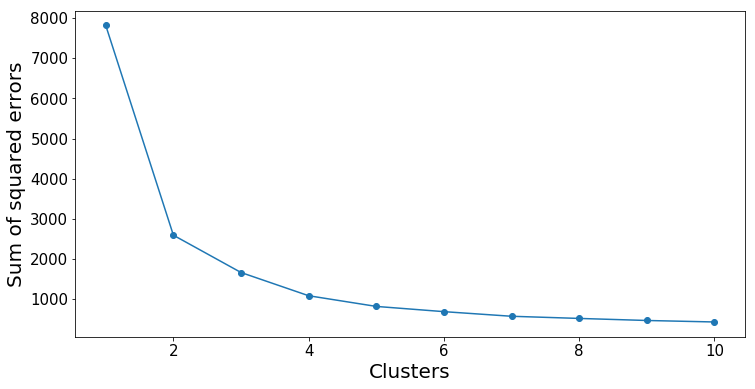

In [0]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.tick_params(labelsize=15)

plt.xlabel("Clusters", fontsize=20)
plt.ylabel("Sum of squared errors", fontsize=20)

Assuming that there are 11 players lets try 11 clusters

In [0]:
from sklearn.cluster import KMeans

#Specify the model
k_means_model = KMeans(n_clusters = 11)
#Fit the model to the data
k_means_model.fit(X);
# OVERLAP
from sklearn.metrics import accuracy_score
accuracy_score(k_means_model.labels_, df['Real_Position'])

0.061195310265942236

Not good of a score but actually we narrowed them down to 
1. Goal keeper
2. Defence
3. Midfielder
4. Lateral Midfielder
5. Striker

And from the errors calculation it does show that it starts to levels off after 5, so we'll go try for 6 and not overshoot it

In [0]:
#Specify the model
k_means_model = KMeans(n_clusters = 6)
#Fit the model to the data
k_means_model.fit(X);
# OVERLAP
from sklearn.metrics import accuracy_score
accuracy_score(k_means_model.labels_, df['Real_Position'])

0.2899056334000572

In [0]:
#Specify the model
k_means_model = KMeans(n_clusters = 2)
#Fit the model to the data
k_means_model.fit(X);
# OVERLAP
from sklearn.metrics import accuracy_score
accuracy_score(k_means_model.labels_, df['Real_Position'])

0.11581355447526451

We need to reduce all the 65 dimensions of the X_norm dataframe into 2, so will use PCA to do this.
This essentially turns a set of correlated features into a set of linearly uncorrelated ones, capturing the greatest variablity between features. Of course now, the 2 PCA dimensions on their own are fairly meaningless

In [0]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

In [0]:
# Number of clusters
kmeans = KMeans(n_clusters=6)
# Fitting the input data
kmeans = kmeans.fit(transformed)
# Getting the cluster labels
labels = kmeans.predict(transformed)
# Centroid values
C = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [0]:
transformed['cluster'] = clusters

Add back Attributes

In [0]:
names  =  df['Name'].tolist()
potential = df['Potential'].tolist()
overall = df['Overall'].tolist()
real_position = df['Real_Position'].tolist()
undervalued = df['Undervalued'].tolist()


transformed['name'] = names
transformed['Potential'] = potential
transformed['Overall'] = overall
transformed['Real_Position'] = real_position
transformed['Undervalued'] = undervalued



In [0]:
transformed.columns = ['x','y','cluster','name', 'Potential', 'Overall', 'Real_Position', 'Undervalued']
transformed_sample = transformed.sample(n=100, random_state=1)


We took a sample to be able to display on a chart

In [0]:
transformed_sample.head()

,x,y,cluster,name,Potential,Overall,Real_Position,Undervalued
7465,-0.290320,-0.424013,4,André Ferreira,75,67,1,1
2939,0.734076,-0.259957,2,Rúben Ferreira,73,73,2,0
6839,0.443792,0.254051,1,B. Kee,68,68,5,0
14749,-0.528137,-0.298259,0,C. Kablan,65,59,2,1
13690,0.448297,0.102020,1,M. Gillespie,64,61,1,0


C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


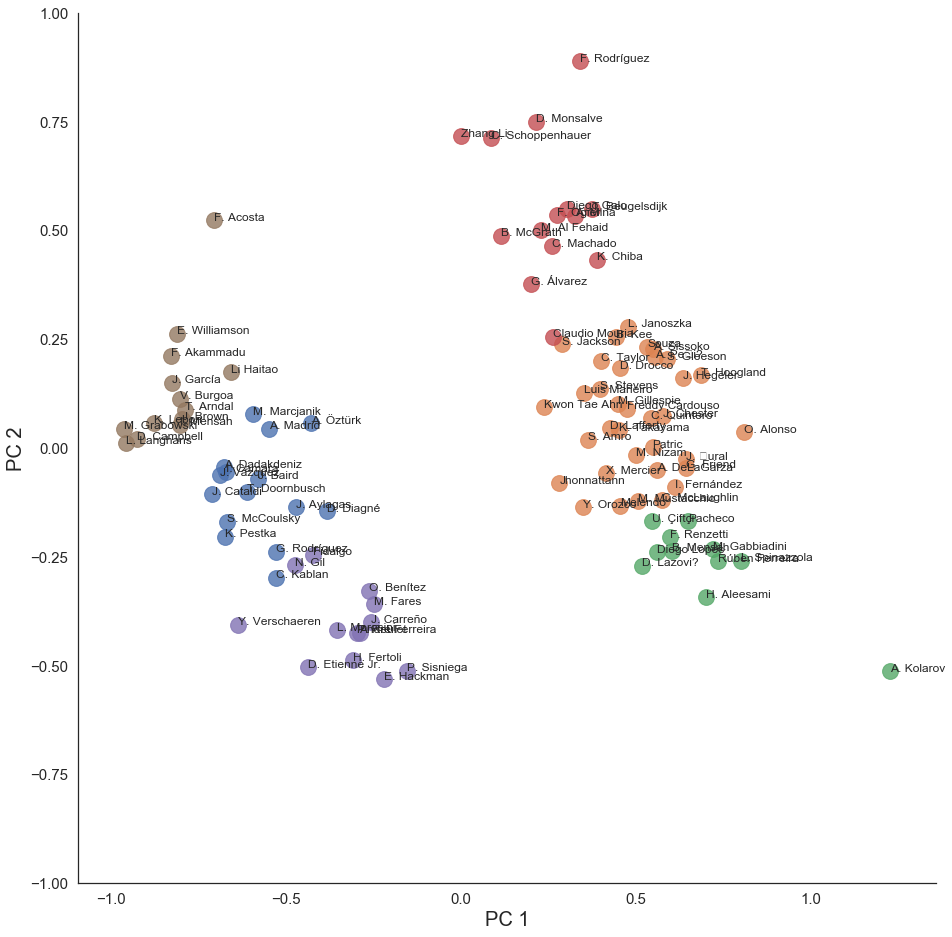

In [0]:

sns.set(style="white")

ax = sns.lmplot(x="x", y="y",hue='cluster', data=transformed_sample, legend=False,
                   fit_reg=False, size =13, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(transformed_sample.x, transformed_sample.y, transformed_sample.name):
    texts.append(plt.text(x, y, s))


#ax._legend.set_title(prop={fontsize:'15'})
ax.set(ylim=(-1, 1))
plt.tick_params(labelsize=15)
#plt.setp(ax.get_legend().get_title(), fontsize='15')
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)
plt.show()

In [0]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_norm,df['Real_Position'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:


from sklearn.model_selection import train_test_split
import sklearn as sk
from sklearn import linear_model
X_trn, X_tst, Y_trn, Y_tst = train_test_split(dfnm, df['Real_Position'], test_size=0.4)

print('accuracy on training data',logreg.score(X_trn, Y_trn))
print('accuracy on test data',logreg.score(X_tst, Y_tst))

accuracy on training data 0.35058621675722046
accuracy on test data 0.3328567343437232


Conclusions from PCA:
    1. There was a bias as it took some fields more important than others
    2. As positions are quite tricky, a Defence is good defending, but can also be moved forward a bit to midfield laterely to push for an attack
    3. There are no clear cuts on positions where Defence stops and one becomes a midfield, and same for striker

## 6) Neural Networks

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dfpca.head()

,ID,LS,ST,RS,LW,LF,CF,RF,RW,LAM,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Undervalued
0,158023,88,88,88,92,93,93,93,92,93,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,0
1,20801,91,91,91,89,90,90,90,89,88,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,0
2,190871,84,84,84,89,89,89,89,89,89,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,0
3,193080,0,0,0,0,0,0,0,0,0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,0
4,192985,82,82,82,87,87,87,87,87,88,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,0


In [0]:
scaler = StandardScaler()
scaler.fit(dfpca)
X = scaler.fit_transform(dfpca.drop('Undervalued', axis =1))
y = dfpca['Undervalued'].values
y_cat = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat,
                                                    random_state=22,
                                                    test_size=0.2)

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD

model = Sequential()
#model.add(Dense(32, input_shape=(61,), activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(2, activation='softmax'))
#model.compile(Adam(lr=0.05),
 #             loss='categorical_crossentropy',
  #            metrics=['accuracy'])

model.add(Dense(64, input_shape=(61,), activation='tanh')) #tanh
model.add(Dense(64, activation='tanh'))
model.add(Dense(2, activation='sigmoid'))
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, verbose=2, validation_split=0.3)


y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Train on 9791 samples, validate on 4197 samples
Epoch 1/20
 - 1s - loss: 0.3910 - acc: 0.8206 - val_loss: 0.3550 - val_acc: 0.8424
Epoch 2/20
 - 0s - loss: 0.3632 - acc: 0.8380 - val_loss: 0.3530 - val_acc: 0.8454
Epoch 3/20
 - 0s - loss: 0.3511 - acc: 0.8450 - val_loss: 0.3559 - val_acc: 0.8432
Epoch 4/20
 - 0s - loss: 0.3463 - acc: 0.8446 - val_loss: 0.3354 - val_acc: 0.8482
Epoch 5/20
 - 0s - loss: 0.3427 - acc: 0.8462 - val_loss: 0.3447 - val_acc: 0.8425
Epoch 6/20
 - 0s - loss: 0.3376 - acc: 0.8471 - val_loss: 0.3384 - val_acc: 0.8483
Epoch 7/20
 - 0s - loss: 0.3352 - acc: 0.8448 - val_loss: 0.3418 - val_acc: 0.8474
Epoch 8/20
 - 0s - loss: 0.3302 - acc: 0.8507 - val_loss: 0.3477 - val_acc: 0.8414
Epoch 9/20
 - 0s - loss: 0.3280 - acc: 0.8518 - val_loss: 0.3481 - val_acc: 0.8431
Epoch 10/20
 - 0s - loss: 0.3230 - acc: 0.8537 - val_loss: 0.3200 - val_acc: 0.8618
Epoch 11/20
 - 0s - loss: 0.3225 - acc: 0.8551 - val_loss: 0.3397 - val_acc: 0.8503
Epoch 12/20
 - 0s - loss: 0.3195 - ac

In [0]:
accuracy_score(y_test_class, y_pred_class)
print(classification_report(y_test_class, y_pred_class))


              precision    recall  f1-score   support

           0       0.98      0.40      0.57      1869
           1       0.59      0.99      0.74      1628

   micro avg       0.67      0.67      0.67      3497
   macro avg       0.78      0.70      0.65      3497
weighted avg       0.80      0.67      0.65      3497



In [0]:
confusion_matrix(y_test_class, y_pred_class)

array([[ 748, 1121],
       [  16, 1612]])

In [0]:
clf_all_nn = MLPClassifier(random_state=0).fit(X_trn, Y_trn)
acc_all_nn = clf_all_nn.score(X_tst, Y_tst)
print ('Neural Networks Accuracy (Default parameters): {}'.format(acc_all_nn))

parameters_n = [{'alpha': [0.0001, 0.001, 0.01, 0.1], 'hidden_layer_sizes':[(10,),(20,),(100,)]}]
clf_all_nn_g = GridSearchCV(MLPClassifier(random_state=0), parameters_n)
clf_all_nn_g.fit(X_tst, Y_tst)

print('Best score for train data:', clf_all_nn_g.best_score_)
print('Best alpha:',clf_all_nn_g.best_estimator_.alpha)
print('Best hidden_layer_sizes:',clf_all_nn_g.best_estimator_.hidden_layer_sizes)
print('Score for test data:',clf_all_nn_g.score(X_tst, Y_tst))

C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Networks Accuracy (Default parameters): 0.9056334000571918


C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer:

C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer:

Best score for train data: 0.7862453531598513
Best alpha: 0.1
Best hidden_layer_sizes: (100,)
Score for test data: 0.9761223906205319


C:\Users\ABOUEM8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Our Team for 2019/2020 Season

### Best Formation for our Team
What's the best squad according to FIFA 18 purely based on overall rating?

In [0]:
def get_best_squad(formation):
    Undervalued_copy = Undervalued.copy()
    store = []
    
    # iterate through all positions in the input formation and get players with highest overall respective to the position
    for i in formation:
        store.append([
            i,
            Undervalued_copy.loc[[Undervalued_copy[Undervalued_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False),
            Undervalued_copy[Undervalued_copy['Position'] == i]['Overall'].max(),
            Undervalued_copy.loc[[Undervalued_copy[Undervalued_copy['Position'] == i]['Overall'].idxmax()]]['Age'].to_string(index = False),
            Undervalued_copy.loc[[Undervalued_copy[Undervalued_copy['Position'] == i]['Overall'].idxmax()]]['Club'].to_string(index = False),
            Undervalued_copy.loc[[Undervalued_copy[Undervalued_copy['Position'] == i]['Overall'].idxmax()]]['Value'].to_string(index = False),
            Undervalued_copy.loc[[Undervalued_copy[Undervalued_copy['Position'] == i]['Overall'].idxmax()]]['Wage'].to_string(index = False)
        ])
                      
        Undervalued_copy.drop(Undervalued_copy[Undervalued_copy['Position'] == i]['Overall'].idxmax(), 
                         inplace = True)
    
    # return store with only necessary columns
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'Player', 'Overall', 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [0]:
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
print (get_best_squad(squad_433))

4-3-3
Position             Player Overall Age             Club    Value  Wage
     GK     Sergio Herrera      71  25       CA Osasuna  2000000  5000
     RB         G. Bettini      71  25  Rosario Central  2400000  9000
     CB         M. Degenek      73  24                0        0     0
     CB         S. Ingason      73  24                0        0     0
     LB  Afonso Figueiredo      71  25       Rio Ave FC  2400000  6000
    CDM        J. Góralski      73  25                0        0     0
     CM         L. Paredes      80  24                0        0     0
    CAM          D. Jevti?      70  25      Lech Pozna?  2200000  6000
     RW             P. Tau      75  24                0        0     0
     ST          B. Angulo      71  22                0        0     0
     LW         A. Mitri??      74  23                0        0     0


In [0]:
# 4-4-2
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
print (get_best_squad(squad_442))

4-4-2
Position             Player Overall Age             Club    Value   Wage
     GK     Sergio Herrera      71  25       CA Osasuna  2000000   5000
     RB         G. Bettini      71  25  Rosario Central  2400000   9000
     CB         M. Degenek      73  24                0        0      0
     CB         S. Ingason      73  24                0        0      0
     LB  Afonso Figueiredo      71  25       Rio Ave FC  2400000   6000
     RM         D. Kuzyaev      77  25                0        0      0
     CM         L. Paredes      80  24                0        0      0
     CM            M. Gori      70  25        Frosinone  2100000   9000
     LM            Kahraba      74  24                0        0      0
     ST          B. Angulo      71  22                0        0      0
     ST        J. Maclaren      70  24        Hibernian  2300000  11000


In [0]:
# 4-2-3-1 
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print ('4-2-3-1')
print (get_best_squad(squad_4231))

4-2-3-1
Position             Player Overall Age             Club    Value  Wage
     GK     Sergio Herrera      71  25       CA Osasuna  2000000  5000
     RB         G. Bettini      71  25  Rosario Central  2400000  9000
     CB         M. Degenek      73  24                0        0     0
     CB         S. Ingason      73  24                0        0     0
     LB  Afonso Figueiredo      71  25       Rio Ave FC  2400000  6000
    CDM        J. Góralski      73  25                0        0     0
    CDM     Santi Comesaña      70  21   Rayo Vallecano  2400000  8000
    CAM          D. Jevti?      70  25      Lech Pozna?  2200000  6000
    CAM            Rodolfo      70  25         Al Hazem  2200000  8000
    CAM          R. Wolski      70  25    Lechia Gda?sk  2200000  5000
     ST          B. Angulo      71  22                0        0     0


### **Now we are ready for the 2019/2020 Season!!**

![title](uefa.jpg)